# Fitting distributions

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [20]:
size = 100
xdata = np.linspace(0, 10, size) + np.random.normal(scale=0.01, size=size)
ydata = 3 * np.sin(xdata) + np.random.normal(scale=0.1, size=size)

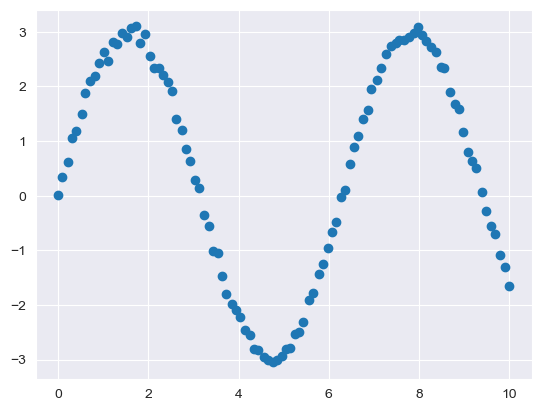

In [21]:
plt.figure()
plt.plot(xdata, ydata, 'o')


In [22]:
def cos_func(x, yscale, xscale, xshift):
    y = yscale * np.cos(xscale * x + xshift)
    return y

In [23]:
parameters, covariance = curve_fit(cos_func, xdata, ydata)

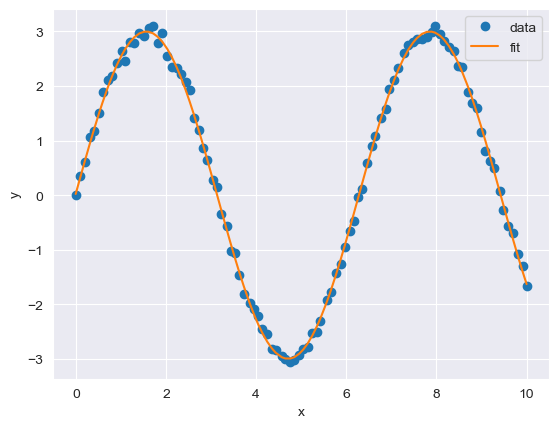

In [24]:
fit_yscale = parameters[0]
fit_xscale = parameters[1]
fit_xshift = parameters[2]

fit_cosine = cos_func(xdata, fit_yscale, fit_xscale, fit_xshift)
# a better way
fit_cosine = cos_func(xdata, *parameters)

plt.figure()
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Uncertainty in the fit

The covariance matrix returned by `curve_fit` contains the variance of the fit parameters along the diagonal. The square root of the diagonal elements gives the standard deviation of the fit parameters. This can be used to estimate the uncertainty in the fit.


In [25]:
uncertainties = np.sqrt(np.diag(covariance))
print("Result of fit")
for name, value, uncertainty in zip(['yscale', 'xscale', 'xshift'], parameters, uncertainties):
    print(f"{name}: {value:.3f} +/- {uncertainty:.3f}")

Result of fit
yscale: -2.996 +/- 0.013
xscale: 0.999 +/- 0.001
xshift: 1.582 +/- 0.008


## Fitting distributions

A $\chi^2$ is used inside the `curve_fit` function to determine the best fit parameters. The $\chi^2$ is defined as
$$
\chi^2 = \sum \left( \frac{y_{\text{data}} - y_{\text{fit}}}{\sigma} \right)^2
$$
where $\sigma$ is the uncertainty in the data. The `curve_fit` function minimizes the $\chi^2$ to determine the best fit parameters.

This corresponds to a maximum likelihood fit if the uncertainties in the data are Gaussian.

More generally, we may want to fit a distribution to data. Thereby, we can use the `scipy.stats` module, which provides a large number of distributions and the minimizan function `scipy.optimize.minimize` to minimize the negative log likelihood.

In [26]:
gaussdata = np.random.normal(0.2, 1.2, 1000)

In [27]:
def create_nll(data, dist):
    def nll(params):
        return -np.sum(dist.logpdf(data, *params))
    return nll

In [28]:
from scipy.stats import norm
from scipy.optimize import minimize

In [29]:
nll = create_nll(gaussdata, norm)

In [30]:
result = minimize(nll, [0, 1])

In [31]:
print(f"Best fit parameters: mu = {result.x[0]}, sigma = {result.x[1]}")

Best fit parameters: mu = 0.1431883783373142, sigma = 1.228573535022818


## Beyond a Gaussian

The `scipy.stats` module provides a large number of distributions, but is not exhaustive and provides no way to fit distributions that require numerical methods; most importantly, a distribution needs to be normalized by its integral.
SciPy lacks more sophisticated models such as (_or is not optimized for_):
  - multidimensional distributions
  - binned fits
  - products of distributions, convolutions, etc.  (need numerical integration)
  - custom models (only if the integral can be calculated)

As we've seen in our example, the NLL was built from scratch and does not contain any information about the parameters or the model. This can be cumbersome and error-prone. Uncertainties are not provided by default and need to be calculated manually.

But that's fine! SciPy stats is a great tool for simple fits and provides basic distributions with many useful methods.

For more complex fits, other libraries can be used, notably `zfit` for likelihood fits.